# Midterm Project : M.A.F.I.A. in the morning(1)
* * *

## 해 보실 일들
* 아래 “해야 할 일들”은 꼭 이 일들만 하라는 뜻이 아닙니다. 이외에도 주어진 문제를 다양하게 분석하고 실험해 보세요.

* 이 프로젝트는 마피아를 확률 시뮬레이션으로 실험해보는 프로젝트입니다.
    * 프로젝트는 코드의 구현보다는 "실험"을 해보시고, 시뮬레이션 데이터를 통해 확률을 더 잘 이해해보자는 취지입니다
    * 그래서 당연히 정해진 정답이 없습니다.
    * 틀려도 됩니다. 노력에는 보상이 따를 것입니다.
    * 제출하실 때 코드와 함께 짧은 (A4용지 2~3장 내외) 보고서를 같이 내 주세요.
    * 더 길게 내셔도 됩니다. 다만 같은 내용을 반복한다든지 하는 방법은 피해주세요.

## 1. 가장 단순한 마피아 게임
* 일단 시민과 마피아 딱 두 종류의 집단만 있다고 생각해 봅시다.
* 아래의 상황을 시뮬레이션으로 만들어 보세요.
* 하루는 낮과 밤으로 이루어져 있습니다. 
    * 게임은 낮을 먼저, 밤을 나중에 합니다: 1일차 낮 → 1일차 밤 → 2일차 낮 → 2일차 밤 → ... 
    * 낮에는 모든 사람이 무작위적으로 한 사람을 죽입니다. 마피아는 서로를 알고 있지만, 사람을 죽이는 것은 무작위적이라고 생각하시면 됩니다.
    * 밤에는 마피아가 시민 중에 한 명을 죽입니다. 
* 처음에 주어진 마피아와 시민의 수에 따라서 시민과 마피아의 승률은 어떻게 될까요? 여러번 시뮬레이션을 해 보시면서 주어진 조건에 대해 평균 승률을 구해 보세요. 
* 혹시 시민과 마피아의 수에 대해서 어떤 패턴이 보이시나요? 보인다면 그 이유는 무엇일까요?
    * 잘 보이지 않는다면 한 변수를 고정하고 다른 변수를 하나씩 증가하면서 관측을 여러번 해 보세요

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import random 

### 구현 방법

- 게임 참가인원의 직업을 string형으로 갖는 List를 생성
- 낮
    - 마피아는 마피아를 제외한 시민 중 한 명을 각각 투표
    - 시민은 모든 인원 중 한 명을 투표
    - 투표는 완전한 랜덤으로 이루어지고 그 중 최빈값을 찾아 맨 앞의 값을 반환
        - 참가인원 리스트에는 마피아가 먼저 할당되어있고 마피아끼리는 팀을 이룰 수 있기 때문에 마피아의 의견을 먼저 따른다는 가정
- 밤
    - 마피아는 각자 시민 중 한명을 투표
    -  투표는 완전한 랜덤으로 이루어지고 그 중 최빈값을 찾아 맨 앞의 값을 반환
- 각 게임은 100번 진행 후 시민의 승리 수를 %로 반환
- 정해진 게임 인원별 승률 데이터와 마피아/참가자 비율에 대한 승률 데이터를 구현

### Code

- job_Init(사람 수, 직업, 리스트) : 게임 참여자 리스트에 각 인원의 직업을 초기화

In [2]:
def job_Init(num, job, list):
    for i in range(0, num):
        list.append(job)

- people_Count(리스트) : 인원 수의 변동을 업데이트

In [3]:
def people_Count(list):
    mafia=list.count("mafia")
    citizen=list.count("citizen")
    participant = mafia+citizen
    return mafia, citizen, participant

- modefinder(리스트) : 최빈값을 찾음

In [4]:
def modefinder(numbers): 
    c = Counter(numbers) 
    mode = c.most_common(1) 
    return mode[0][0]

- day_Vote(리스트) : 낮 투표 후 생존인원 반환

In [5]:
def day_Vote(participants):
    vote_list=list()
    for i in range(0, len(participants)):
        if participants[i]=="mafia":
            vote=random.randrange(participants.index("citizen"), len(participants))
            vote_list.append(vote)
        else:
            vote=random.randrange(0, len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    del participants[max_vote]
    return participants

#participants=["mafia", "citizen", "citizen","citizen","citizen","citizen", "citizen","citizen","citizen", "citizen"]
#print(participants)
#print(day_Vote(participants))

- night_Kill(리스트) : 마피아 상의 후 시민 1명을 죽임, 생존인원 반환

In [6]:
def night_Kill(participants):
    vote_list=list()
    for i in range(0, participants.index("citizen")):
        if participants[i]=="mafia":
            vote=random.randrange(participants.index("citizen"), len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    del participants[max_vote]
    return participants

#participants=["mafia", "citizen", "citizen","citizen","citizen","citizen", "citizen","citizen","citizen", "citizen"]
#print(participants)
#print(night_Kill(participants))

- Game_Endday : 게임이 종료되는 날짜를 담는 리스트

In [7]:
Game_Endday=list()

- in_Game(리스트) : 게임을 구현, 시민의 승리일 경우 `True`를 반환

In [8]:
def in_Game(participants):
    turn = "morning"
    day=1
    mafia, citizen, people = people_Count(participants)
    while (mafia > 0) & (people-mafia > mafia) == True:
        if turn == "morning":
            participants = day_Vote(participants)
            turn = "night"
        else:
            participants = night_Kill(participants)
            turn = "morning"
            day+=1
        mafia, citizen, people = people_Count(participants)
    #print(participants)
    Game_Endday.append(day)
    if mafia == 0:
        return True
    else:
        return False

#participants=["mafia", "citizen", "citizen","citizen","citizen","citizen", "citizen","citizen","citizen", "citizen"]
#in_Game(participants)

- citizen_win_Rate(리스트) : 게임을 100번 시행 후 확률을 %로 반환

In [9]:
def citizen_win_Rate(participants):
    wincount = 0
    mafia=participants.count("mafia")
    citizen=participants.count("citizen")
    times=100
    for i in range(0,times):
        participants=list()
        job_Init(mafia, "mafia", participants)
        job_Init(citizen, "citizen", participants)
        if in_Game(participants) == True:
            wincount += 1
    return wincount/times*100
    
#participants=["mafia", "citizen", "citizen","citizen","citizen","citizen", "citizen","citizen","citizen", "citizen"]
#print(citizen_win_Rate(participants))

* Mafia_Game_Stats(마피아 수, 시민 수) : 정해진 마피아 수와 시민 수에 대해 평균 승률을 100번 구함

In [10]:
def Mafia_Game_Stats(num_mafia, num_citizen):
    mafia = num_mafia
    citizen = num_citizen
    citizen_win_list=list()
    for i in range (0, 100):
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

#Mafia_Game_Stats(1, 5)

- Mafia_Game_Basic(마피아 수, 시민 수) : 전체 인원 수에서 마피아의 비율을 늘려가며 확률을 담은 리스트 반환

In [11]:
def Mafia_Game_Change_Members(num_mafia, num_citizen):
    mafia = num_mafia
    citizen = num_citizen
    citizen_win_list=list()
    while mafia < citizen:
        mafia += 1
        citizen -= 1
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

#Mafia_Game_Basic(0, 10)

### Data Frame
- 마피아가 2명, 시민이 8명일 때 100번의 게임 중 시민의 우승 확률을 100번 구함

In [12]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game_Stats = Mafia_Game_Stats(2, 8)
length=len(Game_Stats)
index_Game_Stats = list()
for i in range(1, length+1):
    index_Game_Stats.append(i)

df=pd.DataFrame(Game_Stats, index_Game_Stats, columns=col)
df

,Citizens to Win(%)
1,2.0
2,4.0
3,4.0
4,5.0
5,7.0
...,...
96,7.0
97,6.0
98,1.0
99,6.0


### Histogram

x축은 횟수, y축은 시민의 승률

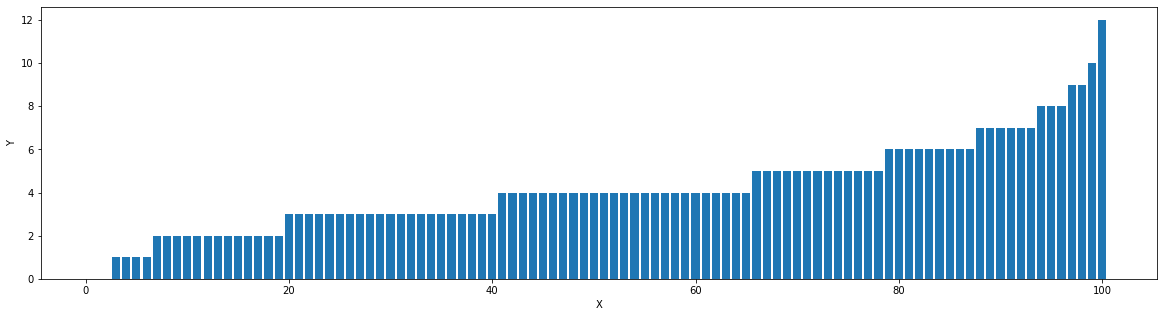

In [13]:
def drawHIST(list1):
    length=len(list1)
    list2 = list()
    for i in range(1, length+1):
        list2.append(i)
    plt.figure(figsize=(20,5))
    plt.bar(list2, list1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    plt.close()

Game_Stats = Mafia_Game_Stats(2, 8)
Game_Stats.sort()
drawHIST(Game_Stats)

C:\Users\csw43\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\csw43\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\csw43\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\csw43\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\csw43\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\csw43\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49849 missing from c

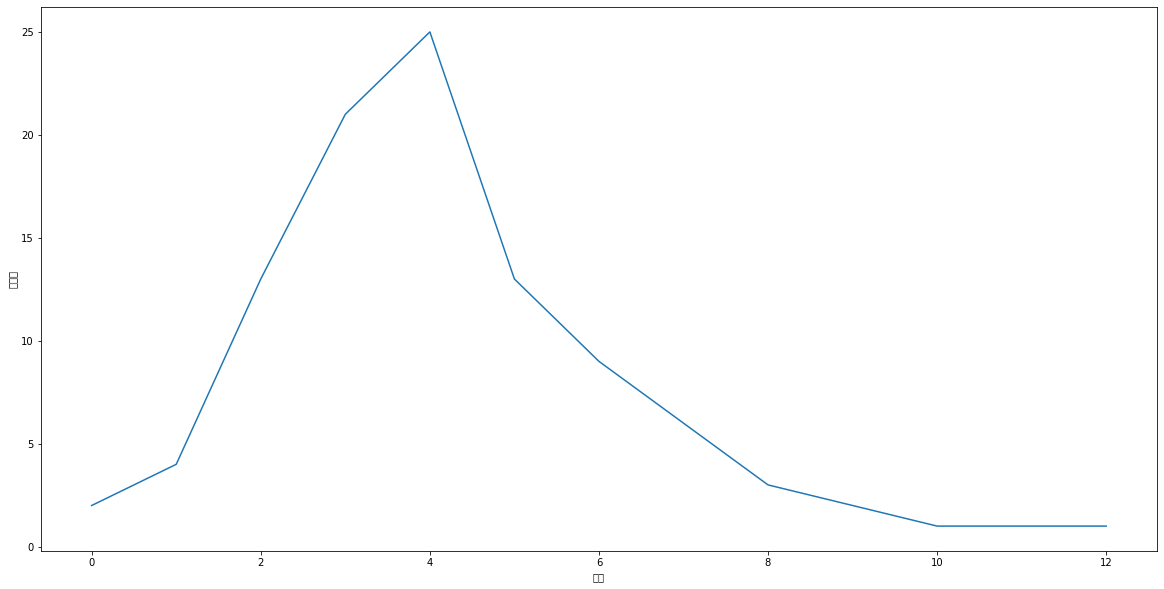

In [14]:
c = Counter(Game_Stats) 
plt.figure(figsize=(20,10))
plt.plot(c.keys(), c.values())
plt.xlabel("Rate")
plt.ylabel("Freqeucy")
plt.show()
plt.close()

### Plot Chart

* 게임인원 10명 중 마피아수에 대한 각 랜덤확률(마피아 1,2,3명)

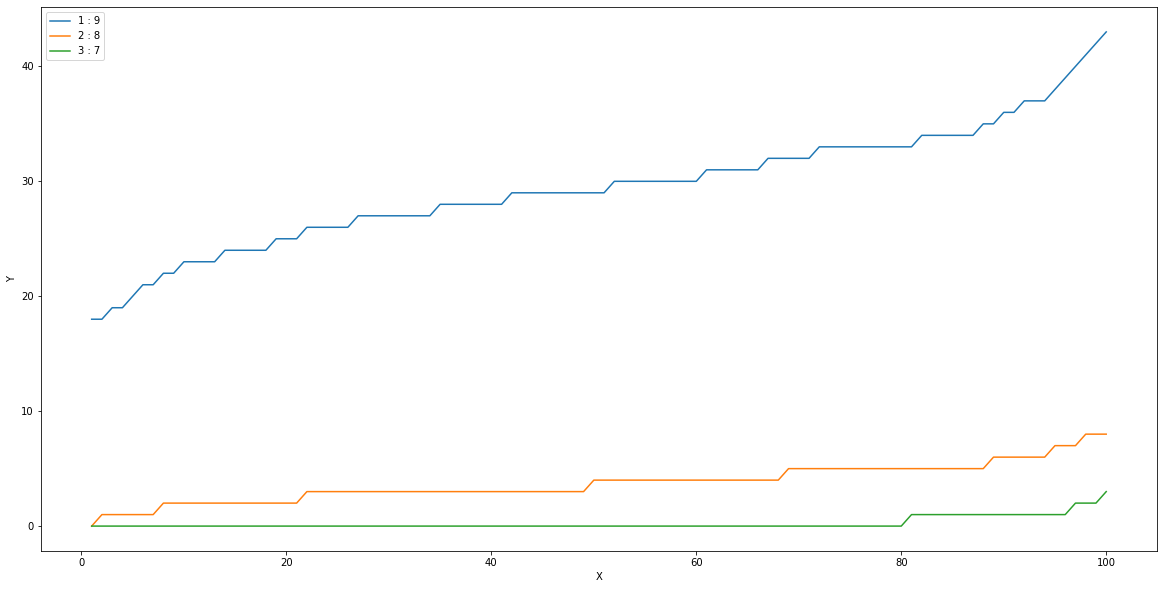

In [15]:
Game_Endday.clear()
Game_Stats1 = Mafia_Game_Stats(1,9)
Game_Stats1.sort()
Game_Stats2 = Mafia_Game_Stats(2,8)
Game_Stats2.sort()
Game_Stats3 = Mafia_Game_Stats(3,7)
Game_Stats3.sort()

list0 = list()
for i in range(1, length+1):
    list0.append(i)
plt.figure(figsize=(20,10))
plt.plot(list0, Game_Stats1, label="1 : 9")
plt.plot(list0, Game_Stats2, label="2 : 8")
plt.plot(list0, Game_Stats3, label="3 : 7")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

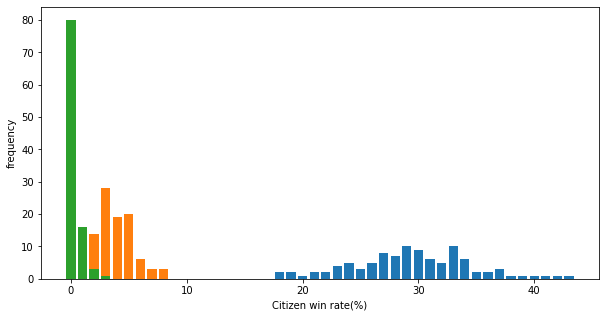

In [16]:
c1 = Counter(Game_Stats1) 
c2 = Counter(Game_Stats2) 
c3 = Counter(Game_Stats3) 
plt.figure(figsize=(10,5))
plt.bar(c1.keys(), c1.values())
plt.bar(c2.keys(), c2.values())
plt.bar(c3.keys(), c3.values())
plt.xlabel("Citizen win rate(%)")
plt.ylabel("frequency")
plt.show()
plt.close()

### Plot Chart
- 위 상황에 대한 게임 종료일 나열
- 상황 1,2,3에 대해 10,000단위 구분

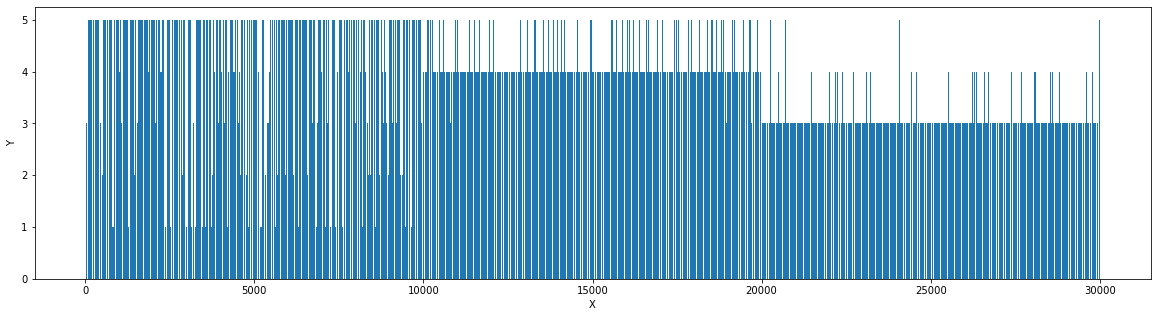

In [17]:
drawHIST(Game_Endday)
Game_Endday.clear()

### Data Frame
- 전체 게임인원 100명 중 마피아의 비율(%)을 인덱스로 하여 확률을 나타냄

In [18]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game_Change_stats = Mafia_Game_Change_Members(0, 100)[:20]
length=len(Game_Change_stats)
index_Change_stats = list()
for i in range(1, length+1):
    index_Change_stats.append(i)

df=pd.DataFrame(Game_Change_stats, index_Change_stats, columns=col)
df

,Citizens to Win(%)
1,69.0
2,53.0
3,38.0
4,12.0
5,8.0
6,4.0
7,3.0
8,1.0
9,0.0
10,0.0


### Histogram

- x축은 마피아의 명 수, y축은 시민의 승률

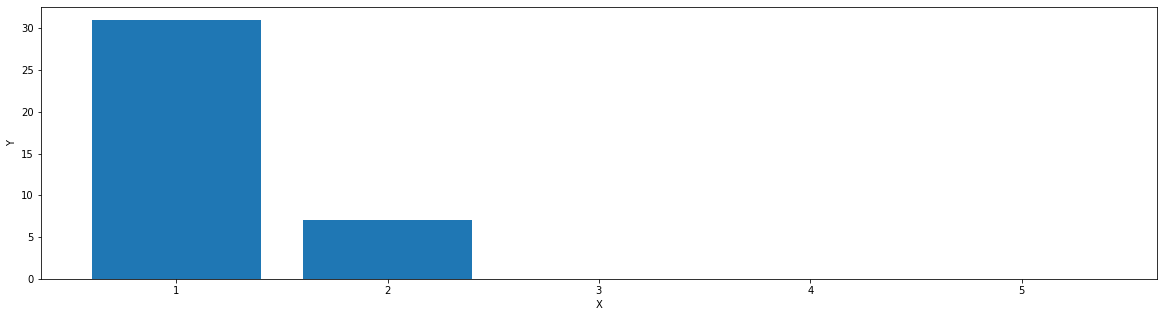

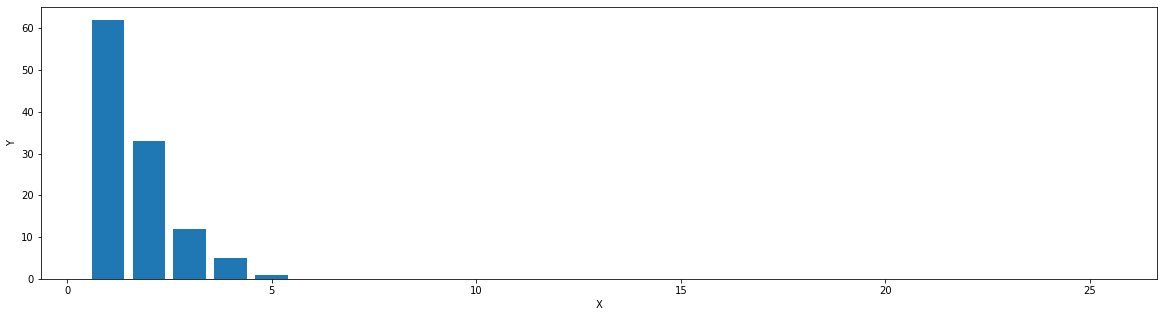

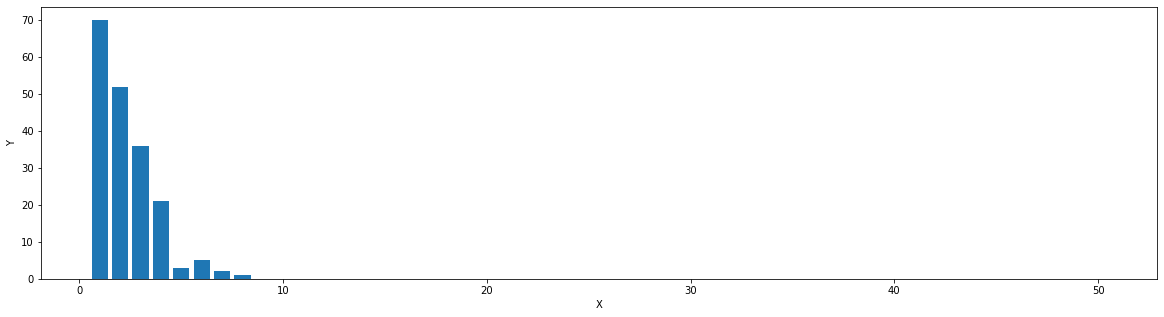

In [19]:
Game_Endday.clear()
Game_Change_stats1=Mafia_Game_Change_Members(0, 10)
drawHIST(Game_Change_stats1)

Game_Change_stats1=Mafia_Game_Change_Members(0, 50)
drawHIST(Game_Change_stats1)

Game_Change_stats2=Mafia_Game_Change_Members(0, 100)
drawHIST(Game_Change_stats2)

### Plot Chart
- 위 상황에 대한 게임 종료일 나열
- 상황 1,2,3에 대해 x축 기준 500, 2500, 5000 구분

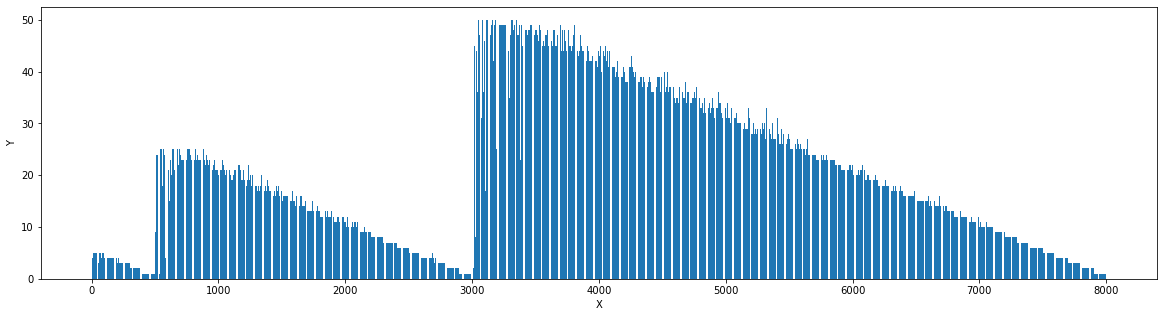

8000


In [20]:
drawHIST(Game_Endday)
print(len(Game_Endday))
Game_Endday.clear()

### 분석
---
- 모든 확률을 Random하게 부여해 각 상황마다의 편차가 큼
- 마피아와 시민의 비율을 보통 1:3 이하로 설정하지만 위 상황에서는 1:10만 되어도 시민의 승리확률이 대폭 하락함
    - 실제 게임에서는 시민이 마피아를 추리하여 맞출 수 있는 확률은 턴이 지날수록 계속 상승함
    - 회의를 통해 마피아를 찾을 수 있는 단서를 무시하고 모든 상황을 랜덤으로 부여하였기 때문에 이러한 결과가 나온 것이라 예측
---
- 게임인원이 10명일 때 마피아 1명, 50명일 때 2명, 100명일 때 3명이 적합하다는 그래프가 산출됨
    - 참가자가 많아질수록 마피아가 죽을 확률이 감소함
    - 시민의 승률은 인원이 같은 비율로 변동되었을 떄에 같은 비율을 유지하지 않음
    - 참가자가 많아질수록 마피아 비율에 따른 시민의 승률은 더욱 적다
        - 참가자가 많아져도 그 비율만큼 마피아의 수를 늘려주는것은 적합하지 않다고 볼 수 있음
---
- 게임 인원과 게임 소요시간은 비례함
    - 또한 마피아의 수와 반비례함
    - 게임인원이 많아지고 마피아의 수가 줄어들수록 소요시간은 길어짐
    - 마피아의 수가 많아지고 게임 인원이 줄어들수록 소요시간은 짧아짐
---